## House Prices : Advanced Regression Techniques

In [186]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import theils_u

In [187]:
#define parent data path
data_parent_path='data'

In [188]:
#read train and test data
train_data=pd.read_csv(os.path.join(data_parent_path,'train.csv'))
test_data=pd.read_csv(os.path.join(data_parent_path,'test.csv'))

In [189]:
#print first 5 rows of train data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [190]:
#print first 5 rows of test data
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [191]:
#print shape of train and test data
print("Train data has {} rows and {} columns".format(train_data.shape[0],train_data.shape[1]))
print("Test data has {} rows and {} columns".format(test_data.shape[0],test_data.shape[1]))

Train data has 1460 rows and 81 columns
Test data has 1459 rows and 80 columns


In [192]:
#print column names of train and test data
print(train_data.columns)
print("--------------------------------------------------------------------------")
print(test_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [193]:
#print dtypes of all columns of train data
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [194]:
#print names and length of categorical columns in train data
print(train_data.select_dtypes(include='object').columns)
print( )
non_numeric_cols = len(train_data.select_dtypes(include='object').columns)
print("Total Columns with Non-numeric data = {}".format(non_numeric_cols))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Total Columns with Non-numeric data = 43


In [195]:
#print names and length of numerical columns in train data
print(train_data.select_dtypes(include=['int','float']).columns)
print( )
numeric_cols = len(train_data.select_dtypes(include=['int','float']).columns)
print("Total Columns with numeric data = {}".format(numeric_cols))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Total Columns with numeric data = 38


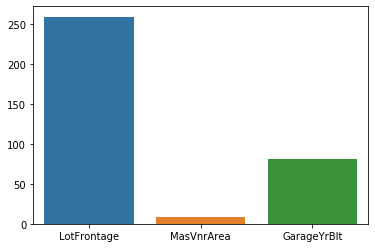

In [196]:
#plot total number of null values in numerical columns in train data
missing_values_info=train_data.select_dtypes(include=['int','float']).isna().sum()
missing_values_info=missing_values_info[missing_values_info>0]
sns.barplot(missing_values_info.index.values,missing_values_info)

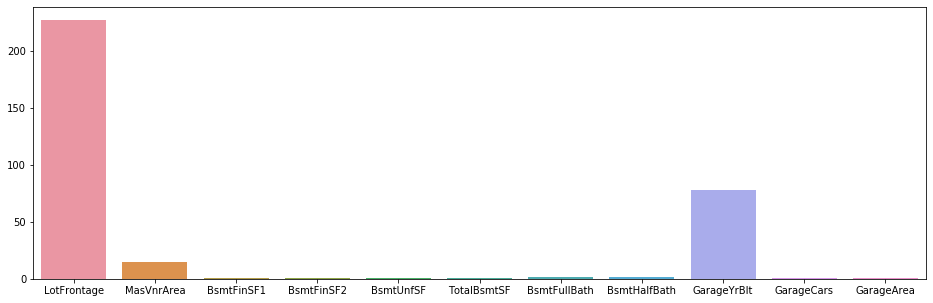

In [197]:
#plot total number of null values in numerical columns in test data
missing_values_info=test_data.select_dtypes(include=['int','float']).isna().sum()
missing_values_info=missing_values_info[missing_values_info>0]
plt.figure(figsize=(16,5))
sns.barplot(missing_values_info.index.values,missing_values_info)

In [198]:
#impute lot frontage with mean strategy in train data
print("Missing vaues in lot frontage before imputation:",train_data['LotFrontage'].isna().sum())
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
print("Missing vaues in lot frontage after imputation:",train_data['LotFrontage'].isna().sum())

Missing vaues in lot frontage before imputation: 259
Missing vaues in lot frontage after imputation: 0


In [199]:
#impute lot frontage with mean strategy in test data
print("Missing vaues in lot frontage before imputation:",test_data['LotFrontage'].isna().sum())
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
print("Missing vaues in lot frontage after imputation:",test_data['LotFrontage'].isna().sum())

Missing vaues in lot frontage before imputation: 227
Missing vaues in lot frontage after imputation: 0


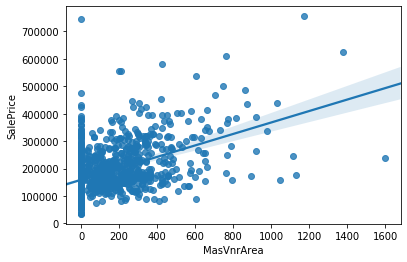

In [200]:
#plot reg plot between target variable and MasVnrArea
sns.regplot(x=train_data['MasVnrArea'],y=train_data['SalePrice'])
#since SalePrice and MasVnrArea have strong positive correlation we will not drop it

In [201]:
#fill null values in MasVnrArea with 0.0 in train data
print("Missing vaues in MasVnrArea before imputation:",train_data['MasVnrArea'].isna().sum())
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
print("Missing vaues in MasVnrArea after imputation:",train_data['MasVnrArea'].isna().sum())

Missing vaues in MasVnrArea before imputation: 8
Missing vaues in MasVnrArea after imputation: 0


In [202]:

#fill null values in MasVnrArea with 0.0 in test data
print("Missing vaues in MasVnrArea before imputation:",test_data['MasVnrArea'].isna().sum())
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
print("Missing vaues in MasVnrArea after imputation:",test_data['MasVnrArea'].isna().sum())

Missing vaues in MasVnrArea before imputation: 15
Missing vaues in MasVnrArea after imputation: 0


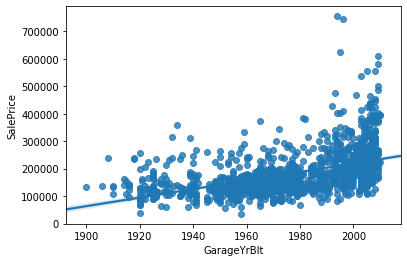

In [203]:
#plot reg plot between target variable and GarageYrBtl
sns.regplot(x=train_data['GarageYrBlt'],y=train_data['SalePrice'])
#since GaragreYrBlt and SalePrice have strong positive correlation we will not drop it

In [204]:
def replace_year(garageyear,houseyear):
    if garageyear< houseyear:
        return houseyear
    else:
        return garageyear

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


1980.0


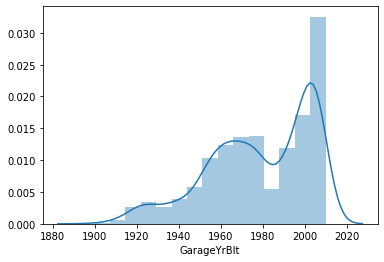

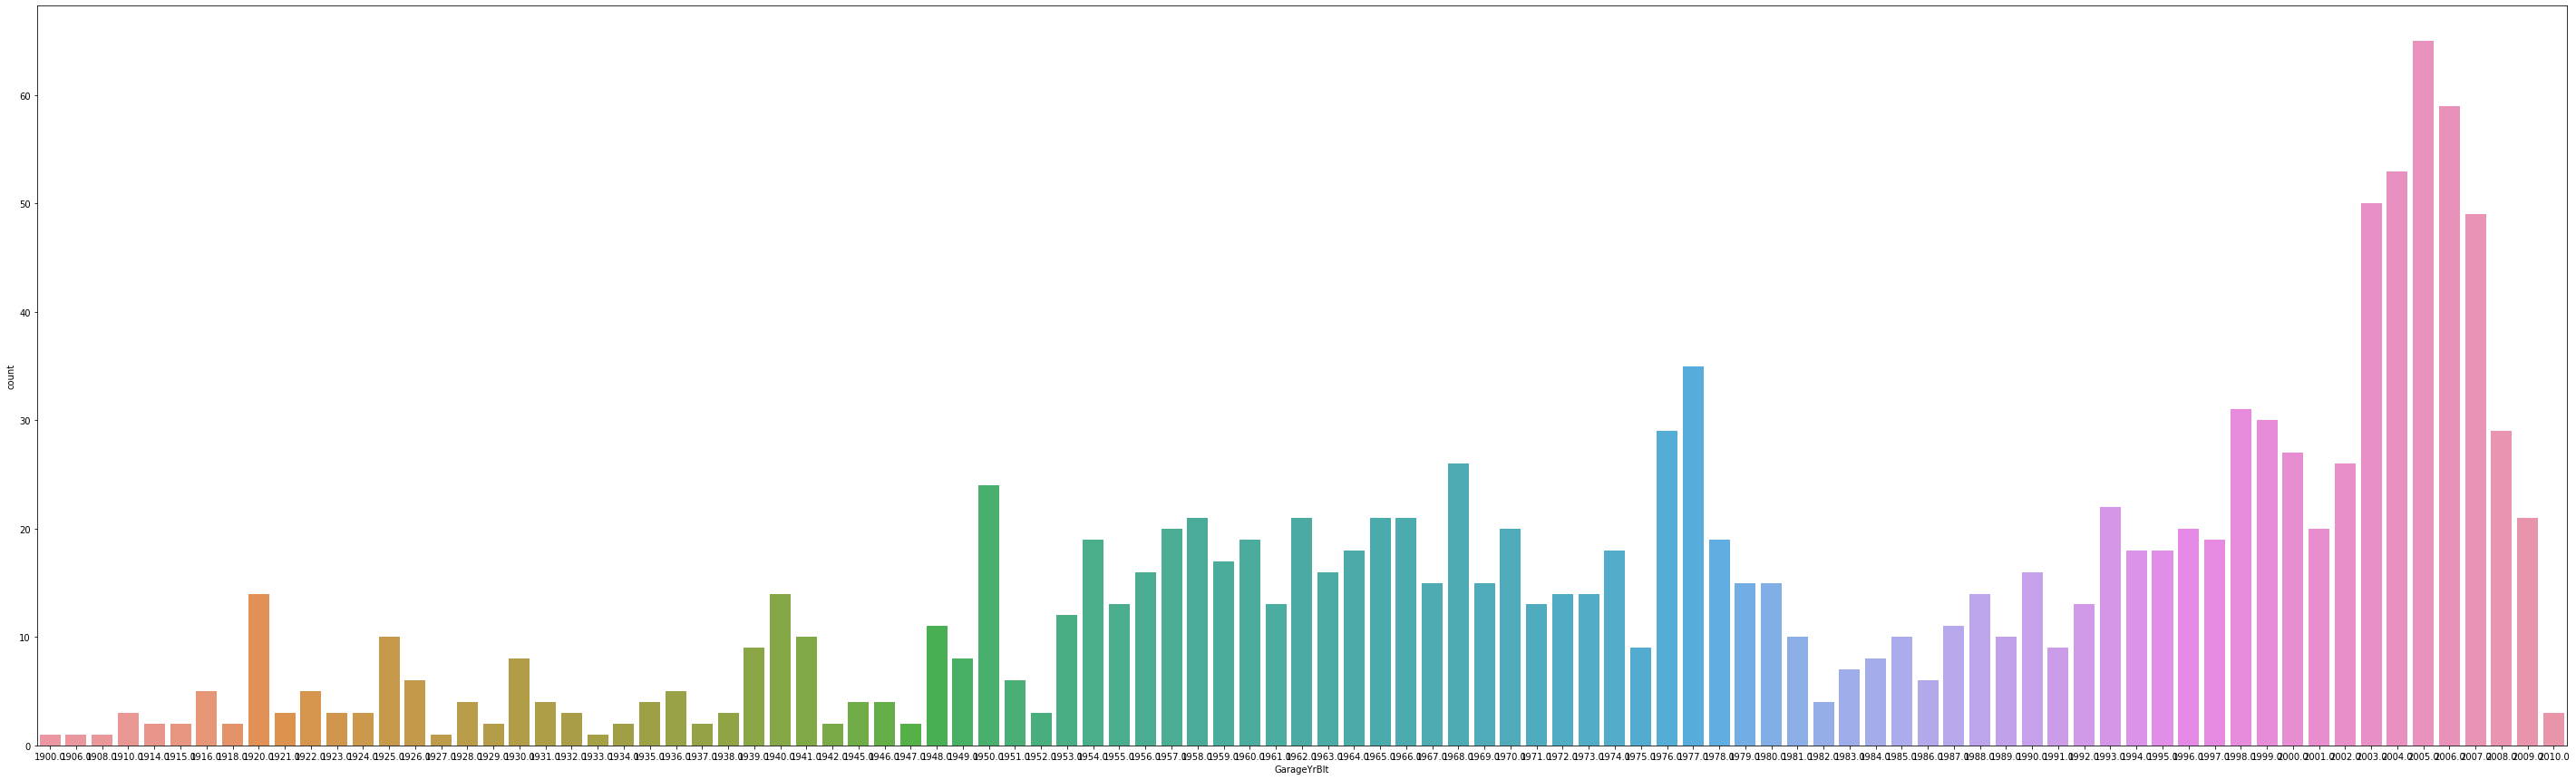

In [205]:

sns.distplot(train_data.GarageYrBlt[train_data['GarageYrBlt'].values>0],hist=True)
print(train_data['GarageYrBlt'].median())
plt.figure(figsize=(50,15))
sns.countplot(train_data['GarageYrBlt'])

In [208]:
#fill null values in GarageYrBlt with median acc to neighborhood in train data
print("Missing vaues in GarageYrBlt before imputation:",train_data['GarageYrBlt'].isna().sum())
train_data.GarageYrBlt.fillna(train_data.groupby(['Neighborhood']).transform('median').GarageYrBlt, inplace=True)
#check if Garage is built before House , replace it with year in which house is built
train_data['GarageYrBlt']=train_data.apply(lambda x:replace_year(x.GarageYrBlt,x.YearBuilt),axis=1)
print("Missing vaues in GarageYrBlt after imputation:",train_data['GarageYrBlt'].isna().sum())

Missing vaues in GarageYrBlt before imputation: 0


/usr/local/lib64/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Missing vaues in GarageYrBlt after imputation: 0


/usr/local/lib64/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [209]:
#fill null values in GarageYrBlt with median acc to neighborhood in test data
print("Missing vaues in GarageYrBlt before imputation:",test_data['GarageYrBlt'].isna().sum())
test_data.GarageYrBlt.fillna(test_data.groupby(['Neighborhood']).transform('median').GarageYrBlt, inplace=True)
#check if Garage is built before House , replace it with year in which house is built
test_data['GarageYrBlt']=test_data.apply(lambda x:replace_year(x.GarageYrBlt,x.YearBuilt),axis=1)
print("Missing vaues in GarageYrBlt after imputation:",test_data['GarageYrBlt'].isna().sum())
#train_data.groupby(['Neighborhood']).GarageYrBlt.median()


Missing vaues in GarageYrBlt before imputation: 0


/usr/local/lib64/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Missing vaues in GarageYrBlt after imputation: 0


/usr/local/lib64/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [210]:

#fill null values in BsmtFinSF1 with mode i.e 0.0 in test data
print("Missing vaues in BsmtFinSF1 before imputation:",test_data['BsmtFinSF1'].isna().sum())
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mode()[0])
print("Missing vaues in BsmtFinSF1 after imputation:",test_data['BsmtFinSF1'].isna().sum())

Missing vaues in BsmtFinSF1 before imputation: 1
Missing vaues in BsmtFinSF1 after imputation: 0


In [211]:
#fill null values in BsmtFinSF2 with mode i.e 0.0 in test data
print("Missing vaues in BsmtFinSF2 before imputation:",test_data['BsmtFinSF2'].isna().sum())
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mode()[0])
print("Missing vaues in BsmtFinSF2 after imputation:",test_data['BsmtFinSF2'].isna().sum())

Missing vaues in BsmtFinSF2 before imputation: 1
Missing vaues in BsmtFinSF2 after imputation: 0


In [212]:
#fill null values in BsmtUnfSF with mean in test data
print("Missing vaues in BsmtUnfSF before imputation:",test_data['BsmtUnfSF'].isna().sum())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
print("Missing vaues in BsmtUnfSF after imputation:",test_data['BsmtUnfSF'].isna().sum())

Missing vaues in BsmtUnfSF before imputation: 1
Missing vaues in BsmtUnfSF after imputation: 0


In [213]:
#fill null values in TotalBsmtSF with mean in test data
print("Missing vaues in TotalBsmtSF before imputation:",test_data['TotalBsmtSF'].isna().sum())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
print("Missing vaues in TotalBsmtSF after imputation:",test_data['TotalBsmtSF'].isna().sum())

Missing vaues in TotalBsmtSF before imputation: 1
Missing vaues in TotalBsmtSF after imputation: 0


In [214]:
#fill null values in BsmtFullBath with mode i.e. 0.0 in test data
print("Missing vaues in BsmtFullBath before imputation:",test_data['BsmtFullBath'].isna().sum())
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
print("Missing vaues in BsmtFullBath after imputation:",test_data['BsmtFullBath'].isna().sum())

Missing vaues in BsmtFullBath before imputation: 2
Missing vaues in BsmtFullBath after imputation: 0


In [215]:
#fill null values in BsmtHalfBath with mode i.e. 0.0 in test data
print("Missing vaues in BsmtHalfBath before imputation:",test_data['BsmtHalfBath'].isna().sum())
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
print("Missing vaues in BsmtHalfBath after imputation:",test_data['BsmtHalfBath'].isna().sum())

Missing vaues in BsmtHalfBath before imputation: 2
Missing vaues in BsmtHalfBath after imputation: 0


In [216]:
#fill null values in GarageCars i.e. 2.0 in test data
print("Missing vaues in GarageCars before imputation:",test_data['GarageCars'].isna().sum())
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mode()[0])
print("Missing vaues in GarageCars after imputation:",test_data['GarageCars'].isna().sum())

Missing vaues in GarageCars before imputation: 1
Missing vaues in GarageCars after imputation: 0


In [217]:
#fill null values in GarageArea with mean in test data
print("Missing vaues in GarageArea before imputation:",test_data['GarageArea'].isna().sum())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
print("Missing vaues in GarageArea after imputation:",test_data['GarageArea'].isna().sum())

Missing vaues in GarageArea before imputation: 1
Missing vaues in GarageArea after imputation: 0


In [218]:
#check null values in train and test data in numerical columns
print(train_data.select_dtypes(include=['int','float']).isna().sum())
print("==============")
print(test_data.select_dtypes(include=['int','float']).isna().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0

16


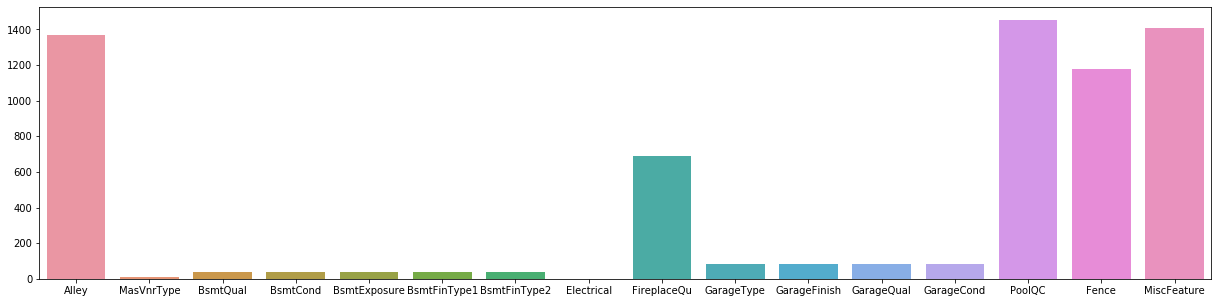

In [219]:
#plot total number of null values in categorical columns in train data
missing_values_info=train_data.select_dtypes(include=['object']).isna().sum()
missing_values_info=missing_values_info[missing_values_info>0]
print(len(missing_values_info))
plt.figure(figsize=(21,5))
sns.barplot(missing_values_info.index.values,missing_values_info)

22


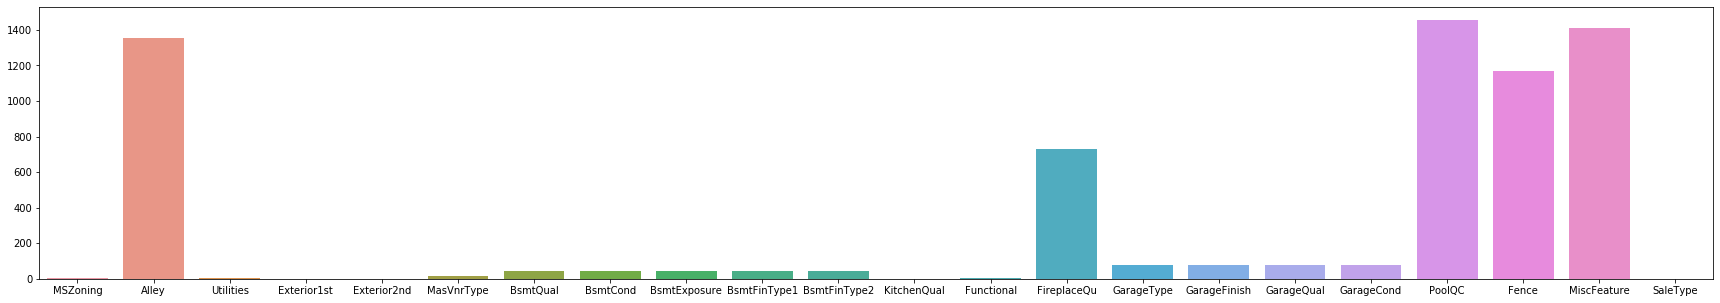

In [220]:
#plot total number of null values in categorical columns in test data
missing_values_info=test_data.select_dtypes(include=['object']).isna().sum()
missing_values_info=missing_values_info[missing_values_info>0]
print(len(missing_values_info))
plt.figure(figsize=(30,5))
sns.barplot(missing_values_info.index.values,missing_values_info)

In [221]:
#Alley,PoolQC,Fence and MiscFeature have more than 90% null values and FireplaceQu has around 50% null valuesso we will drop these columns
train_data.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
test_data.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
print('Train data shape',train_data.shape)
print('Test data shape',test_data.shape)

Train data shape (1460, 76)
Test data shape (1459, 75)


In [222]:
#analyse column MasVnrType in train data
print("Null values count",train_data['MasVnrType'].isna().sum())
print("Unique values count",train_data['MasVnrType'].value_counts())

Null values count 8
Unique values count None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [223]:
#fill MasVnrType with Mode i.e: None
print("Missing vaues in MasVnrType before imputation:",train_data['MasVnrType'].isna().sum())
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
print("Missing vaues in MasVnrType after imputation:",train_data['MasVnrType'].isna().sum())

Missing vaues in MasVnrType before imputation: 8
Missing vaues in MasVnrType after imputation: 0


In [224]:
print("Missing vaues in MasVnrType before imputation:",test_data['MasVnrType'].isna().sum())
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
print("Missing vaues in MasVnrType after imputation:",test_data['MasVnrType'].isna().sum())

Missing vaues in MasVnrType before imputation: 16
Missing vaues in MasVnrType after imputation: 0


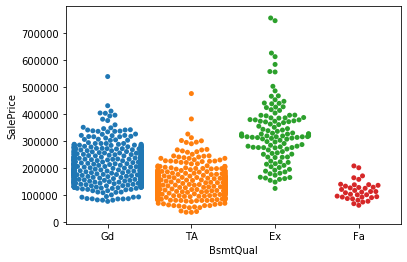

In [225]:
sns.swarmplot(train_data['BsmtQual'],train_data['SalePrice'])

In [226]:
def correlation_between_cat_columns(column_name):    
    cat_cols = [col for col in train_data.select_dtypes(include=object)]

    bsmt = []
    for i in cat_cols:
        for j in cat_cols:
            #print(i,j)
            score = theils_u(x=train_data[i],y=train_data[j])
            if score != 1.0 and i == column_name:
                bsmt.append((j,round(score,2)))

    correlationDf = {}
    def Convert(tup, di): 
        di = dict(tup) 
        return di 
 
    correlationDf= Convert(bsmt,correlationDf)
    correlationdata = pd.DataFrame(correlationDf,index=[column_name])
    #print(correlationdata)
    print("Column {} has highest correlation with {} and correlation value is {}"
          .format(column_name,correlationdata.idxmax(axis=1).values[0],correlationdata.max(axis=1).values[0]))

In [227]:
correlation_between_cat_columns('BsmtQual')

Column BsmtQual has highest correlation with Neighborhood and correlation value is 0.42




> Based on the analysis above we found out that the BsmtQual is highly correlated with Neighborhood. Hence, we can fill missing values in BsmtQual according to groups of Neighborhood

In [228]:
print("Missing vaues in BsmtQual before imputation:",train_data['BsmtQual'].isna().sum())
#impute by mode according to neighborhood
train_data.BsmtQual.fillna(train_data.groupby(['Neighborhood']).transform(lambda x: x.value_counts().idxmax()).BsmtQual, inplace=True)
print("Missing values in BsmtQual after imputation:",train_data['BsmtQual'].isna().sum())

Missing vaues in BsmtQual before imputation: 37
Missing values in BsmtQual after imputation: 0


In [229]:
print("Missing vaues in BsmtQual before imputation:",test_data['BsmtQual'].isna().sum())
#impute by mode according to neighborhood
test_data.BsmtQual.fillna(test_data.groupby(['Neighborhood']).transform(lambda x: x.value_counts().idxmax()).BsmtQual, inplace=True)
print("Missing values in BsmtQual after imputation:",test_data['BsmtQual'].isna().sum())

Missing vaues in BsmtQual before imputation: 44
Missing values in BsmtQual after imputation: 0


In [230]:
correlation_between_cat_columns('BsmtFinType1')

Column BsmtFinType1 has highest correlation with Neighborhood and correlation value is 0.18


In [231]:
train_data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [232]:
train_data.groupby(['Neighborhood'])['BsmtFinType1'].apply(lambda x:x.value_counts().idxmax())

Neighborhood
Blmngtn    GLQ
Blueste    ALQ
BrDale     Unf
BrkSide    Unf
ClearCr    GLQ
CollgCr    GLQ
Crawfor    Unf
Edwards    Unf
Gilbert    Unf
IDOTRR     Unf
MeadowV    GLQ
Mitchel    ALQ
NAmes      BLQ
NPkVill    ALQ
NWAmes     ALQ
NoRidge    GLQ
NridgHt    GLQ
OldTown    Unf
SWISU      Unf
Sawyer     ALQ
SawyerW    GLQ
Somerst    GLQ
StoneBr    GLQ
Timber     GLQ
Veenker    ALQ
Name: BsmtFinType1, dtype: object

>Since BsmtFinType1 have small correlation with Neighborhood but each Neighborhood has different mode value of BsmtFinType1 so we will impute null values by mode value accoerding to neighborhood.

In [233]:
print("Missing vaues in BsmtFinType1 before imputation:",train_data['BsmtFinType1'].isna().sum())
#impute by mode according to neighborhood
train_data.BsmtFinType1.fillna(train_data.groupby(['Neighborhood']).transform(lambda x: x.value_counts().idxmax()).BsmtFinType1, inplace=True)
print("Missing values in BsmtFinType1 after imputation:",train_data['BsmtFinType1'].isna().sum())

Missing vaues in BsmtFinType1 before imputation: 37
Missing values in BsmtFinType1 after imputation: 0


In [234]:
print("Missing vaues in BsmtFinType1 before imputation:",test_data['BsmtFinType1'].isna().sum())
#impute by mode according to neighborhood
test_data.BsmtFinType1.fillna(test_data.groupby(['Neighborhood']).transform(lambda x: x.value_counts().idxmax()).BsmtFinType1, inplace=True)
print("Missing values in BsmtFinType1 after imputation:",test_data['BsmtFinType1'].isna().sum())

Missing vaues in BsmtFinType1 before imputation: 42
Missing values in BsmtFinType1 after imputation: 0


In [235]:
correlation_between_cat_columns('BsmtFinType2')

Column BsmtFinType2 has highest correlation with BsmtCond and correlation value is 0.19


In [236]:
train_data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [237]:
train_data.groupby(['BsmtExposure'])['BsmtFinType2'].apply(lambda x:x.value_counts().idxmax())

BsmtExposure
Av    Unf
Gd    Unf
Mn    Unf
No    Unf
Name: BsmtFinType2, dtype: object

>As we can see BsmtFinType2 has very less correlation with BsmtExposure and most of the value is Unf so we will replace null values in BsmtFinType2 with Unf.

In [238]:
print("Missing values in BsmtFinType2 before imputation:",train_data['BsmtFinType2'].isna().sum())
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0],inplace=True)
print("Missing values in BsmtFinType2 after imputation:",train_data['BsmtFinType2'].isna().sum())

Missing values in BsmtFinType2 before imputation: 38
Missing values in BsmtFinType2 after imputation: 0


In [239]:
print("Missing values in BsmtFinType2 before imputation:",test_data['BsmtFinType2'].isna().sum())
test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0],inplace=True)
print("Missing values in BsmtFinType2 after imputation:",test_data['BsmtFinType2'].isna().sum())

Missing values in BsmtFinType2 before imputation: 42
Missing values in BsmtFinType2 after imputation: 0


In [240]:
#find correlation of BsmtCond with other columns
correlation_between_cat_columns('BsmtCond')

Column BsmtCond has highest correlation with BsmtExposure and correlation value is 0.28


>Based on the analysis above we found out that the BsmtCond is highly correlated with BaseFinType1. Hence, we can fill missing values in BsmtQual according to BaseFinType1.

In [241]:
print("Missing vaues in BsmtCond before imputation:",train_data['BsmtCond'].isna().sum())
#impute by mode according to BsmtFinType1
print(train_data.groupby(['BsmtFinType1'])['BsmtCond'].apply(lambda x: x.value_counts().idxmax()))
train_data.BsmtCond.fillna('TA',inplace=True)
print("Missing values in BsmtCond after imputation:",train_data['BsmtCond'].isna().sum())

Missing vaues in BsmtCond before imputation: 37
BsmtFinType1
ALQ    TA
BLQ    TA
GLQ    TA
LwQ    TA
Rec    TA
Unf    TA
Name: BsmtCond, dtype: object
Missing values in BsmtCond after imputation: 0


In [242]:
print("Missing vaues in BsmtCond before imputation:",test_data['BsmtCond'].isna().sum())
#impute by mode according to BsmtFinType1
print(test_data.groupby(['BsmtFinType1'])['BsmtCond'].apply(lambda x: x.value_counts().idxmax()))
test_data.BsmtCond.fillna('TA',inplace=True)
print("Missing values in BsmtCond after imputation:",test_data['BsmtCond'].isna().sum())

Missing vaues in BsmtCond before imputation: 45
BsmtFinType1
ALQ    TA
BLQ    TA
GLQ    TA
LwQ    TA
Rec    TA
Unf    TA
Name: BsmtCond, dtype: object
Missing values in BsmtCond after imputation: 0


In [243]:
correlation_between_cat_columns('BsmtExposure')

Column BsmtExposure has highest correlation with Neighborhood and correlation value is 0.13


In [244]:
train_data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [245]:
train_data.groupby(['Neighborhood'])['BsmtExposure'].apply(lambda x:x.value_counts().idxmax())

Neighborhood
Blmngtn    No
Blueste    No
BrDale     No
BrkSide    No
ClearCr    Gd
CollgCr    No
Crawfor    No
Edwards    No
Gilbert    No
IDOTRR     No
MeadowV    No
Mitchel    No
NAmes      No
NPkVill    No
NWAmes     No
NoRidge    No
NridgHt    No
OldTown    No
SWISU      No
Sawyer     No
SawyerW    No
Somerst    No
StoneBr    No
Timber     Gd
Veenker    Gd
Name: BsmtExposure, dtype: object

>Since BsmtExposure has very low correlation with Neighborhood but each neighborhood group has different mode value of BsmtExposure so we will fill null values according to groups in neighborhood

In [246]:
print("Missing vaues in BsmtExposure before imputation:",train_data['BsmtExposure'].isna().sum())
#impute by mode according to neighborhood
train_data.BsmtExposure.fillna(train_data.groupby(['Neighborhood']).transform(lambda x: x.value_counts().idxmax()).BsmtExposure, inplace=True)
print("Missing values in BsmtExposure after imputation:",train_data['BsmtExposure'].isna().sum())

Missing vaues in BsmtExposure before imputation: 38
Missing values in BsmtExposure after imputation: 0


In [247]:
print("Missing vaues in BsmtExposure before imputation:",test_data['BsmtExposure'].isna().sum())
#impute by mode according to neighborhood
test_data.BsmtExposure.fillna(test_data.groupby(['Neighborhood']).transform(lambda x: x.value_counts().idxmax()).BsmtExposure, inplace=True)
print("Missing values in BsmtExposure after imputation:",test_data['BsmtExposure'].isna().sum())

Missing vaues in BsmtExposure before imputation: 44
Missing values in BsmtExposure after imputation: 0


In [248]:
train_data['Electrical'].isna().sum()

1

In [249]:
train_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [250]:
print("Missing values in Electrical before imputation:",train_data['Electrical'].isna().sum())
train_data['Electrical'].fillna(train_data['Electrical'].mode()[0],inplace=True)
print("Missing values in Electrical after imputation:",train_data['Electrical'].isna().sum())

Missing values in Electrical before imputation: 1
Missing values in Electrical after imputation: 0


>Test data has no missing values in Electrical column

In [251]:
train_data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [252]:
print("Missing vaues in GarageFinish before imputation:",train_data['GarageFinish'].isna().sum())
#impute by mode 
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0], inplace=True)
print("Missing values in GarageFinish after imputation:",train_data['GarageFinish'].isna().sum())

Missing vaues in GarageFinish before imputation: 81
Missing values in GarageFinish after imputation: 0


In [253]:
print("Missing vaues in GarageFinish before imputation:",test_data['GarageFinish'].isna().sum())
#impute by mode
test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0], inplace=True)
print("Missing values in GarageFinish after imputation:",test_data['GarageFinish'].isna().sum())

Missing vaues in GarageFinish before imputation: 78
Missing values in GarageFinish after imputation: 0


In [254]:
train_data['GarageType'].isna().sum()

81

In [255]:
train_data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [256]:
print("Missing vaues in GarageType before imputation:",train_data['GarageType'].isna().sum())
#impute by mode
train_data['GarageType'].fillna(train_data['GarageType'].mode()[0], inplace=True)
print("Missing values in GarageType after imputation:",train_data['GarageType'].isna().sum())

Missing vaues in GarageType before imputation: 81
Missing values in GarageType after imputation: 0


In [257]:
print("Missing vaues in GarageType before imputation:",test_data['GarageType'].isna().sum())
#impute by mode
test_data['GarageType'].fillna(test_data['GarageType'].mode()[0], inplace=True)
print("Missing values in GarageType after imputation:",test_data['GarageType'].isna().sum())

Missing vaues in GarageType before imputation: 76
Missing values in GarageType after imputation: 0


In [258]:
train_data['GarageCond'].isna().sum()

81

In [259]:
train_data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [260]:
print("Missing vaues in GarageCond before imputation:",train_data['GarageCond'].isna().sum())
#impute by mode
train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0], inplace=True)
print("Missing values in GarageCond after imputation:",train_data['GarageCond'].isna().sum())

Missing vaues in GarageCond before imputation: 81
Missing values in GarageCond after imputation: 0


In [261]:
print("Missing vaues in GarageCond before imputation:",test_data['GarageCond'].isna().sum())
#impute by mode
test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0], inplace=True)
print("Missing values in GarageCond after imputation:",test_data['GarageCond'].isna().sum())

Missing vaues in GarageCond before imputation: 78
Missing values in GarageCond after imputation: 0


In [262]:
train_data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [263]:
print("Missing vaues in GarageQual before imputation:",train_data['GarageQual'].isna().sum())
#impute by mode
train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0], inplace=True)
print("Missing values in GarageQual after imputation:",train_data['GarageQual'].isna().sum())

Missing vaues in GarageQual before imputation: 81
Missing values in GarageQual after imputation: 0


In [264]:
print("Missing vaues in GarageQual before imputation:",test_data['GarageQual'].isna().sum())
#impute by mode
test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0], inplace=True)
print("Missing values in GarageQual after imputation:",test_data['GarageQual'].isna().sum())

Missing vaues in GarageQual before imputation: 78
Missing values in GarageQual after imputation: 0


In [265]:
#check null columns in train data
x=train_data.isna().sum()
x=x[x>0]
x

Series([], dtype: int64)

In [266]:
#check null columns in test data
x=test_data.isna().sum()
x=x[x>0]
x

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

In [267]:
test_data['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [269]:
print("Missing values in MSZoning before imputation:",test_data['MSZoning'].isna().sum())
#impute by mode
test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0],inplace=True)
print("Missing values in MSZoning after imputation:",test_data['MSZoning'].isna().sum())

Missing values in MSZoning before imputation: 4
Missing values in MSZoning after imputation: 0


In [270]:
test_data['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [271]:
print("Missing values in Utilities before imputation:",test_data['Utilities'].isna().sum())
#impute by mode
test_data['Utilities'].fillna(test_data['Utilities'].mode()[0],inplace=True)
print("Missing values in Utilities after imputation:",test_data['Utilities'].isna().sum())

Missing values in Utilities before imputation: 2
Missing values in Utilities after imputation: 0


In [272]:
test_data['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [273]:
print("Missing values in Exterior1st before imputation:",test_data['Exterior1st'].isna().sum())
#impute by mode
test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0],inplace=True)
print("Missing values in Exterior1st after imputation:",test_data['Exterior1st'].isna().sum())

Missing values in Exterior1st before imputation: 1
Missing values in Exterior1st after imputation: 0


In [274]:
print("Missing values in Exterior2nd before imputation:",test_data['Exterior2nd'].isna().sum())
#impute by mode
test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0],inplace=True)
print("Missing values in Exterior2nd after imputation:",test_data['Exterior2nd'].isna().sum())

Missing values in Exterior2nd before imputation: 1
Missing values in Exterior2nd after imputation: 0


In [275]:
test_data['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [ ]:
print("Missing values in Exterior2nd before imputation:",test_data['KitchenQual'].isna().sum())
#impute by mode
test_data['Exterior2nd'].fillna(test_data['KitchenQual'].mode()[0],inplace=True)
print("Missing values in KitchenQual after imputation:",test_data['KitchenQual'].isna().sum())